In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
user_traits=pd.read_csv('../Data/UserTraits.csv')
teachers_characters=pd.read_csv('../Data/TeacherChar.csv')
main=pd.read_csv('../Data/Main.csv')

In [24]:
user_traits.head()

,UserId,Trait
0,0,ACTIVE
1,0,ENERGETIC
2,0,SMART
3,0,QUIET
4,1,LAZY


In [25]:
teachers_characters.head()

,UserId,TeacherChar
0,1,ACTIVE
1,1,TEACHING SLOWLY
2,1,CALM
3,1,FUNNY
4,1,HAPPY


In [26]:
main['time']=pd.to_datetime(main['time'])

In [27]:
main.head()

,ID,time,age,gender,student_pref,specialization,teacher_pref
0,0,2020-08-11 12:07:17-05:30,20,Male,"A TEACHER WHO KNOWS ONLY ONE CHAPTER ,BUT HE /...",Educational based on specialization,2.TEACHING ONLY CHAPTER OF A SUBJECT IN WHICH ...
1,1,2020-08-14 20:23:02-05:30,20,Male,"A TEACHER WHO KNOWS ONLY ONE CHAPTER ,BUT HE /...",Education not based on specialization(avg.),2.TEACHING ONLY CHAPTER OF A SUBJECT IN WHICH ...
2,2,2020-08-14 20:26:08-05:30,20,Male,A TEACHER WHO KNOW ALL CHAPTERS OF A SUBJECT I...,Educational based on specialization,2.TEACHING ONLY CHAPTER OF A SUBJECT IN WHICH ...
3,3,2020-08-14 20:26:59-05:30,20,Male,"A TEACHER WHO KNOWS ONLY ONE CHAPTER ,BUT HE /...",Educational based on specialization,2.TEACHING ONLY CHAPTER OF A SUBJECT IN WHICH ...
4,4,2020-08-14 20:38:29-05:30,20,Male,"A TEACHER WHO KNOWS ONLY ONE CHAPTER ,BUT HE /...",Education based on specialization,2.TEACHING ONLY CHAPTER OF A SUBJECT IN WHICH ...


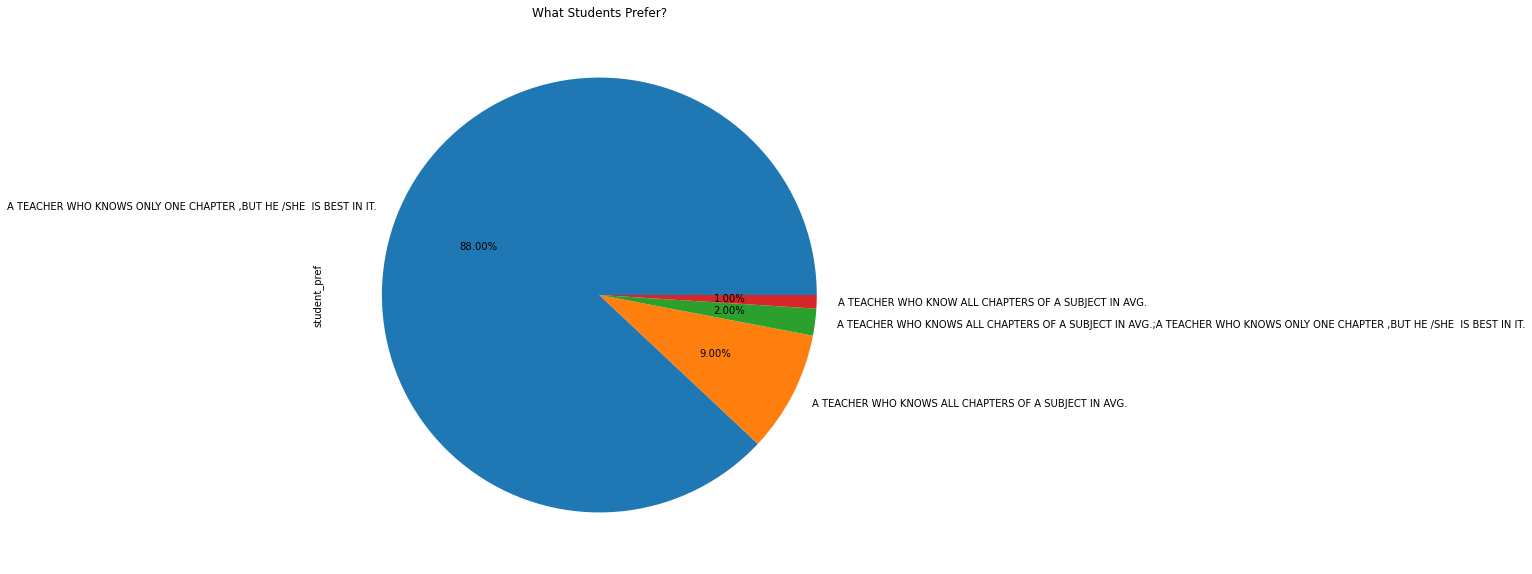

In [28]:
main['student_pref'].value_counts().plot(kind='pie',autopct='%.2f%%', figsize=(10,10))
plt.title('What Students Prefer?')
plt.show()

In [29]:
main['specialization']=np.where(main['specialization']=='Educational based on specialization','Education based on specialization',main['specialization'])

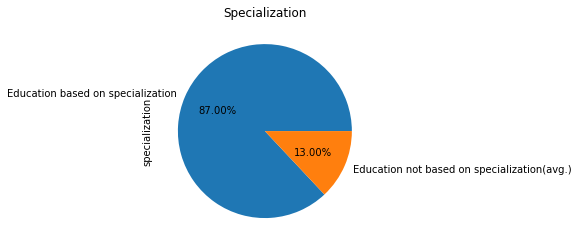

In [30]:
main['specialization'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title("Specialization")
plt.show()

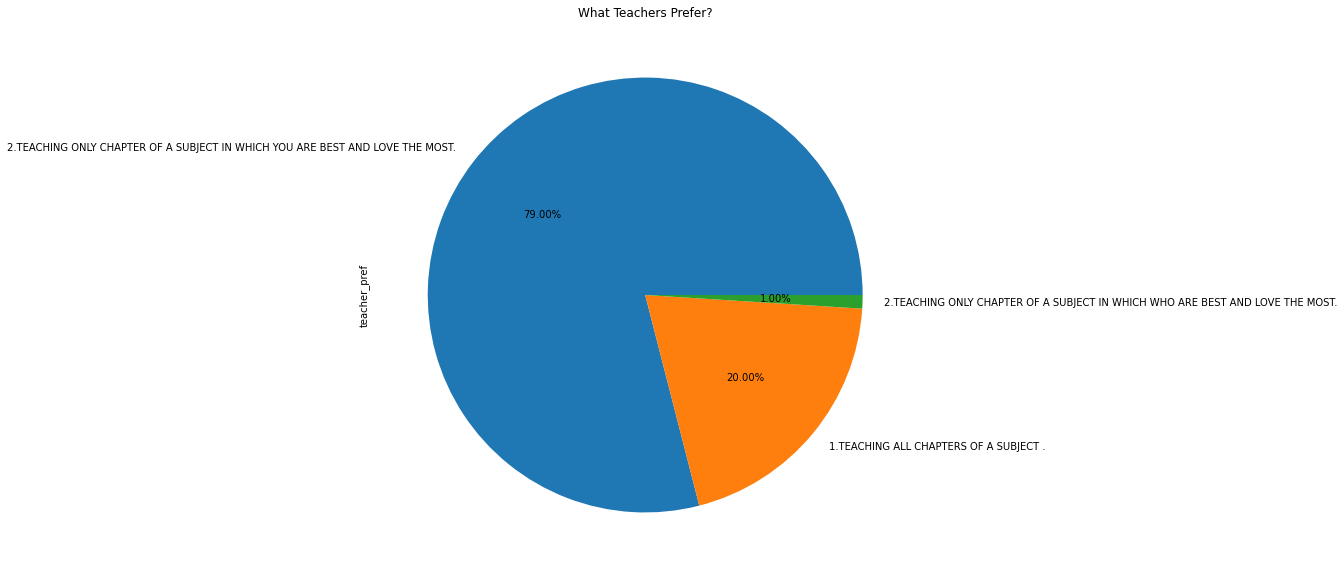

In [31]:
main['teacher_pref'].value_counts().plot(kind='pie',autopct='%.2f%%', figsize=(10,10))
plt.title('What Teachers Prefer?')
plt.show()

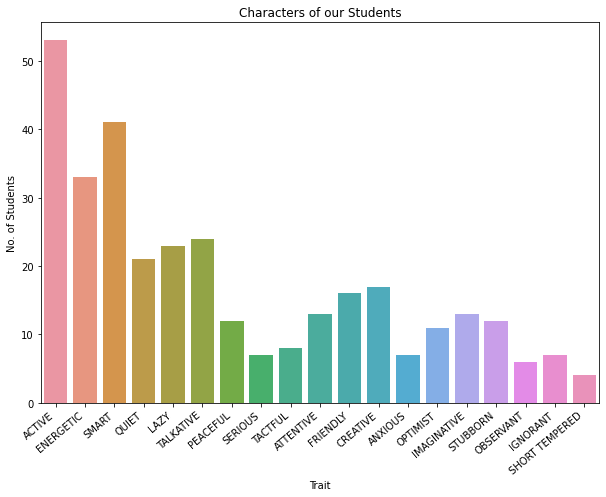

In [32]:
plt.subplots(figsize=(10,7))
ax=sns.countplot(user_traits['Trait'],)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.ylabel('No. of Students')
plt.title('Characters of our Students')
plt.show()

In [33]:
filtered=user_traits['Trait'].value_counts()[(user_traits['Trait'].value_counts()>5) & (user_traits['Trait'].value_counts()<25)].index.tolist()

In [34]:
user_traits=user_traits[user_traits['Trait'].isin(filtered)]

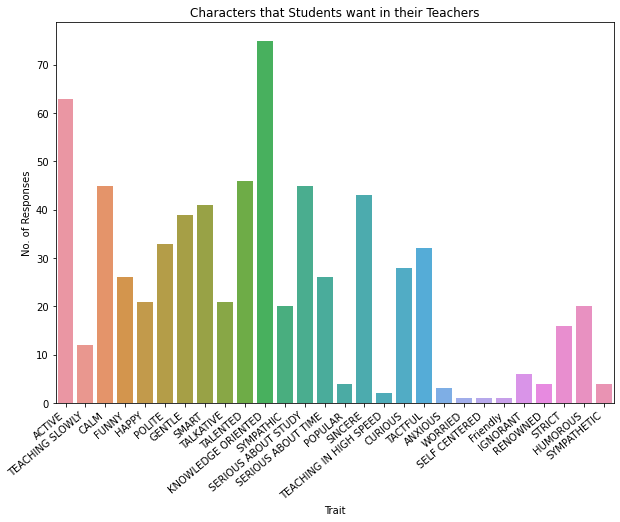

In [36]:
plt.subplots(figsize=(10,7))
ax=sns.countplot(teachers_characters['TeacherChar'],)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.ylabel('No. of Responses')
plt.xlabel('Trait')
plt.title('Characters that Students want in their Teachers')
plt.show()

In [37]:
filtered=teachers_characters['TeacherChar'].value_counts()[(teachers_characters['TeacherChar'].value_counts()>5)& (teachers_characters['TeacherChar'].value_counts()<30)].index.tolist()
teachers_characters=teachers_characters[teachers_characters['TeacherChar'].isin(filtered)]

In [38]:
character_mapping_counts=user_traits.merge(teachers_characters,how='inner').groupby(['Trait','TeacherChar'],as_index=False).agg('count')

In [45]:

char_pivot=character_mapping_counts.pivot_table(columns='TeacherChar',index='Trait',values='UserId')

In [48]:
char_pivot.fillna(0,inplace=True)

## Raw Heatmap

Text(69.0, 0.5, 'User Characters')

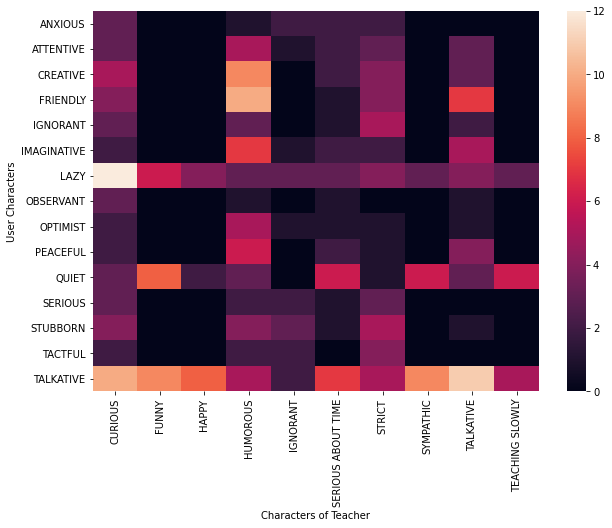

In [49]:
plt.subplots(figsize=(10,7))
sns.heatmap(char_pivot)
plt.xlabel('Characters of Teacher')
plt.ylabel('User Characters')